In [1]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data

In [2]:
from sklearn import mixture as mix

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import talib as ta
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
#import sklearn
#print (sklearn.__version__)

In [105]:
end = dt.date.today()
start = dt.datetime(end.year-5,end.month,end.day)
df = pd.DataFrame(data.DataReader('BSE/BOM500530', 'quandl', start=start, end=end )) #Bosch_Ltd.
df

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2018-11-07,19572.10,19620.25,19400.00,19514.55,19506.350000,178.0,101.0,3472131.0,127.0,71.35,220.25,-57.55
2018-11-06,19530.45,19636.40,19290.00,19347.95,19405.660000,1057.0,349.0,20511780.0,489.0,46.26,346.40,-182.50
2018-11-05,19979.00,19979.00,19250.00,19447.55,19610.080000,2389.0,1081.0,46848484.0,533.0,22.31,729.00,-531.45
2018-11-02,19809.30,20200.00,19102.25,19625.65,19654.890000,1917.0,651.0,37678423.0,357.0,18.62,1097.75,-183.65
2018-11-01,20436.00,20436.00,19517.45,19635.50,19935.090000,1813.0,667.0,36142326.0,544.0,30.01,918.55,-800.50
2018-10-31,19750.00,20098.85,19143.75,19853.60,19709.710000,802.0,286.0,15807190.0,232.0,28.93,955.10,103.60
2018-10-30,19200.00,19800.00,18647.00,19656.60,19212.570000,967.0,437.0,18578556.0,317.0,32.78,1153.00,456.60
2018-10-29,18700.00,19067.75,18635.95,18714.05,18844.440000,414.0,210.0,7801598.0,100.0,24.15,431.80,14.05
2018-10-26,19249.00,19249.00,18328.05,18594.25,18646.220000,914.0,466.0,17042649.0,158.0,17.29,920.95,-654.75


In [107]:
df = df[['Open', 'High', 'Low', 'Close']]
df.describe()

,Open,High,Low,Close
count,1233.000000,1233.000000,1233.000000,1233.000000
mean,19261.405758,19489.914761,18990.104947,19218.591809
std,4502.034926,4545.965059,4431.031947,4485.244853
min,8526.000000,8593.900000,8466.200000,8501.150000
25%,17845.250000,18050.000000,17588.500000,17788.650000
50%,19960.100000,20172.550000,19650.000000,19905.100000
75%,22483.650000,22720.900000,22222.000000,22450.350000
max,27600.000000,27989.250000,27470.600000,27582.750000


In [108]:
#Spliting the data 80% for testing and 20% for training
n = 10
t = 0.8
split = int(t*len(df))
print(split)

986


In [109]:
# print(df['High'][:split])
# print(df['High'].shift(1))
#I created various technical indicators such as, RSI, SMA, ADX, Correlation, 
#Parabolic SAR, and the Return of the past 1- day on an Open to Open basis.

# df['High'] = df['High'].shift(1)
# df['Low'] = df['Low'].shift(1)
# df['Close'] = df['Close'].shift(1)
df['RSI']= ta.RSI(np.array(df['Close']), timeperiod=n)
df['SMA']= df['Close'].rolling(window=n).mean()
df['Corr']= df['SMA'].rolling(window=n).corr(df['Close'])
df['SAR']= ta.SAR(np.array(df['High']),np.array(df['Low']),0.2,0.2)
df['ADX']= ta.ADX(np.array(df['High']),np.array(df['Low']),np.array(df['Close']), timeperiod=n)
df['Return']= np.log(df['Open']/df['Open'].shift(1))

df = df.dropna()
df


,Open,High,Low,Close,RSI,SMA,Corr,SAR,ADX,Return
Date,,,,,,,,,,
2018-10-10,18440.00,18788.95,18404.80,18563.80,45.775671,18467.535,-0.392188,18973.880000,14.751874,0.004893
2018-10-09,18336.20,18574.05,18101.00,18440.40,44.176529,18480.825,-0.353783,18793.104000,14.935164,-0.005645
2018-10-08,18638.95,19069.00,18180.20,18348.70,42.938000,18543.265,0.194983,18070.000000,13.951698,0.016376
2018-10-05,19114.90,19114.90,18700.00,18817.40,50.775519,18594.960,0.520799,18101.000000,13.245042,0.025215
2018-10-04,19388.85,19601.05,18726.85,19103.90,54.975679,18604.000,0.241911,18180.200000,14.296362,0.014230
2018-10-03,19796.85,19944.55,19613.00,19684.10,62.227837,18740.820,0.902179,18464.370000,16.192099,0.020825
2018-10-01,19965.00,19965.00,19353.65,19686.35,62.254034,18812.280,0.935738,18726.850000,16.637707,0.008458
2018-09-28,19914.15,20000.00,19600.00,19817.45,63.876045,18928.680,0.934678,18974.480000,17.149738,-0.002550
2018-09-27,19761.75,20070.35,19550.20,19754.65,62.447761,19046.280,0.904082,19179.584000,17.847561,-0.007682


# Standard Scaler

c:\program files (x86)\python36-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


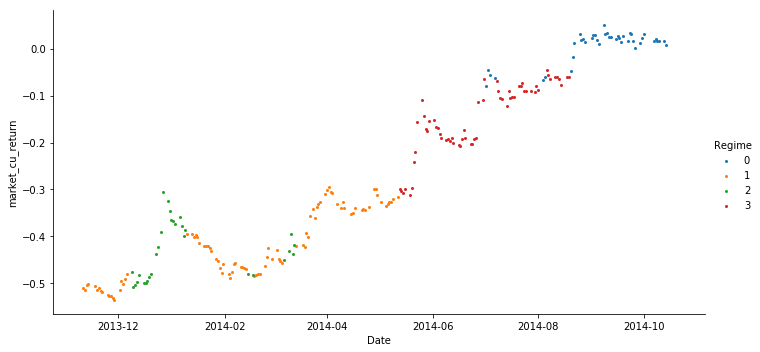

Mean for regime 0: 1.45550202344721
Co-Variance for regime 0: 0.5030972172231782
Mean for regime 1: -0.701157516124619
Co-Variance for regime 1: 0.3639583311336884
Mean for regime 2: -1.2962600162346638
Co-Variance for regime 2: 0.5857030829643071
Mean for regime 3: 0.4165596702349715
Co-Variance for regime 3: 0.45622660757028344


In [110]:
ss = StandardScaler()
unsup = mix.GaussianMixture(n_components=4,covariance_type='spherical', n_init=100, random_state=42)
#df = df.drop(['High','Low','Close'], axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1, df.shape[1])))
regime=unsup.predict(np.reshape(ss.fit_transform(df[split:]),(-1, df.shape[1])))
Regimes= pd.DataFrame(regime, columns=['Regime'],index=df[split:].index).join(df[split:], how='inner').assign(market_cu_return=df[split:].Return.cumsum()).reset_index(drop=False).rename(columns={'index':'Date'})

orders=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes, hue='Regime', hue_order=orders, aspect=2, size=5)
fig.map(plt.scatter, 'Date', 'market_cu_return', s=4).add_legend()
plt.show()

for i in orders:
    print("Mean for regime %i:"%i,unsup.means_[i][0])
    print('Co-Variance for regime %i:'%i,(unsup.covariances_[i]))

In [111]:
ss1 = StandardScaler()
columns = Regimes.columns.drop(['Regime','Date'])
Regimes[columns] = ss1.fit_transform(Regimes[columns])
Regimes['Signal'] = 0
Regimes.loc[Regimes['Return']>0, 'Signal'] = 1
Regimes.loc[Regimes['Return']<0, 'Signal'] = -1

In [112]:
cls = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',max_iter=-1,probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

In [113]:
split2 = int(.8*len(Regimes))

X = Regimes.drop(['Signal','Return', 'market_cu_return', 'Date'], axis=1)
y = Regimes['Signal']
cls.fit(X[:split2],y[:split2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
print(len(X))
p_data = len(X)-split2
print(p_data)

228
46


In [115]:
df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')] = cls.predict(X[split2:])
print(df['Pred_Signal'][-p_data:])
df['str_ret'] = df['Pred_Signal']*df['Return'].shift(-1)

Date
2014-01-15    1
2014-01-14    1
2014-01-13    1
2014-01-10    1
2014-01-09    1
2014-01-08    1
2014-01-07    1
2014-01-06    1
2014-01-03    1
2014-01-02    1
2014-01-01    1
2013-12-31    1
2013-12-30    1
2013-12-27    1
2013-12-26    1
2013-12-24    1
2013-12-23    1
2013-12-20    1
2013-12-19    1
2013-12-18    1
2013-12-17    1
2013-12-16    1
2013-12-13    1
2013-12-12    1
2013-12-11    1
2013-12-10    1
2013-12-09    1
2013-12-06    1
2013-12-05    1
2013-12-04    1
2013-12-03    1
2013-12-02    1
2013-11-29    1
2013-11-28    1
2013-11-27    1
2013-11-26    1
2013-11-25    1
2013-11-22    1
2013-11-21    1
2013-11-20    1
2013-11-19    1
2013-11-18    1
2013-11-14    1
2013-11-13    1
2013-11-12    1
2013-11-11    1
Name: Pred_Signal, dtype: int64


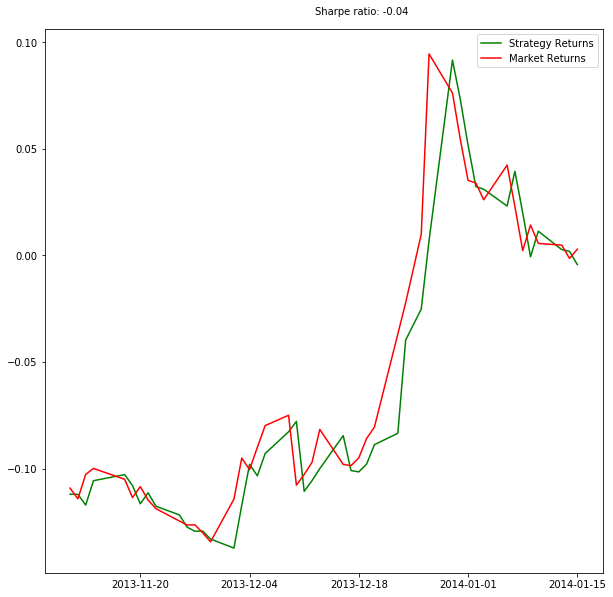

In [116]:
df['strategy_cu_return']=0
df['market_cu_return']=0
df.iloc[-p_data:,df.columns.get_loc('strategy_cu_return')] = np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')] = np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])/np.nanstd(df['strategy_cu_return'][-p_data:])
df.dropna()

fig= plt.subplots(figsize = (10,10))
plt.plot(df['strategy_cu_return'][-p_data:], color='g', label='Strategy Returns')
plt.plot(df['market_cu_return'][-p_data:], color='r', label='Market Returns')
plt.figtext(0.5,0.9, s='Sharpe ratio: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()